# <center>MACHINE LEARNING <br> LAB Session 1</center>

### Due date: up to May, 19th, 23:55h. 
### Submission procedure: via Moodle.

### Objectives: 

In this lab session we will work through a case study of regression predictive modeling problem in Python from scratch following each step phase of a machine learning project: from data exploration to prediction and validation. In particular, the main goals are:
- Exploratory data analysis: descriptive statistics, unimodal and multimodal data visualizations
- Optimization development based on gradient descent: one and multiple variables
- Overfitting prevention: regularization using Ridge and Lasso
- Evaluation of algorithms and effect of variables standardization


### Deliverables per team of two persons:
1. A zip file with all the Python/Jupiter Notebooks. They should be functional and have sufficient comments to allow for proper interpretation.

2. A report consisting of 2 sections:    
    (a) A brief description of the Python functions, their inputs and outputs, and their interoperability. (Approximate length: 1 page).    
    (b) A simulation section that addresses the questions formulated below.

###### Note 1: make sure the plots you include are large enough to be readable (preferably no more than two figures per page), and include legends.

***
### Use Case description:
In this lab exercise we work as data scientists in a large real state company in USA. The sales managers of our company asked us to develop a new analytical model to estimate the market value of houses in Boston.

To develop this use case we will follow each step of a regression machine learning process. We will work with the Boston House Price dataset that was published by the Boston Standard Metropolitan Statistical Area in the 70s. **Each record in the database describes a Boston suburb or town**. The dataset housing.csv (**download it!**) is a modified version of the Boston Housing dataset from the UCI Machine Learning Repository.  The attributes are defined as follows:
 
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) 1
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s

Notice that MEDV is our target value $t$ since we are asked to estimate the price of the houses in Boston. Thus, our input attributes $x_1,\dots,x_D$ are the other 13 attributes (so $D = 13$).  The features 'RM', 'LSTAT', and 'PTRATIO' give us quantitative information about each data point. 

***
### Questions

In [64]:
# Read dataset and import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

# Load the Boston housing dataset
boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Q1. Exploratory data analysis**

Consider the 3 most significative attributes (RM, LSTAT and PTRATIO) and the variable to predict (MEDV).

a) Evaluate the dimension of the dataset and the type of the given variables (float, string, integer, etc.).

b) Generate a table with the main statistics of the distribution (i.e. mean, standard deviation, median, min and max) of each attribute.

c) Calculate the correlation between all of the numeric attributes and comment the results. Which are the variables with more and less correlation with respect to the variable to predict (MEDV)?

d) Plot a histogram of each of the numeric attributes. Can you recognize any specific distribution (exponential, bimodal...)? 

---Media---
RM:  6.284634387351788
LSTAT:  12.653063241106723
PTRATIO:  18.455533596837967
---Mediana---
RM:  6.208499999999999
LSTAT:  11.36
PTRATIO:  18.455533596837967
---Minimo y Maximo---
RM:  3.5610000000000004 8.78
LSTAT:  1.73 37.97
PTRATIO:  12.6 22.0
---Desviacion estandar---
RM:  0.7019225143345689
LSTAT:  7.134001636650485
PTRATIO:  2.162805191482142


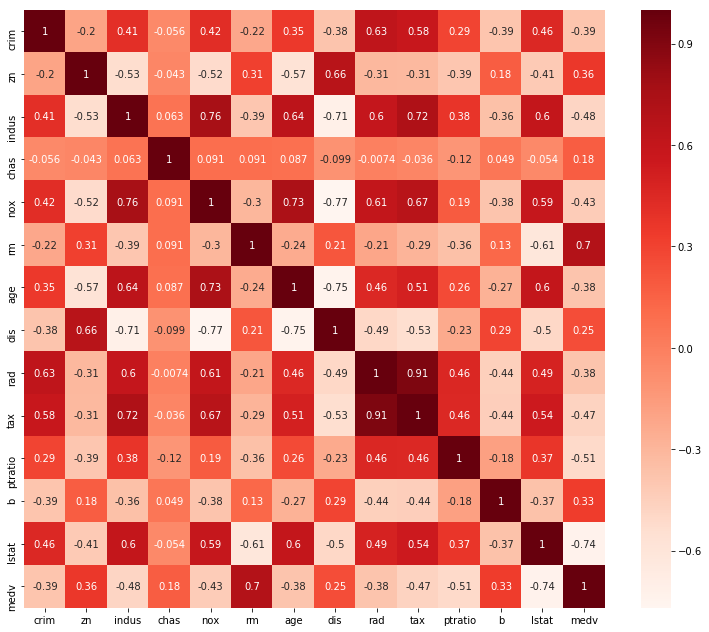

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

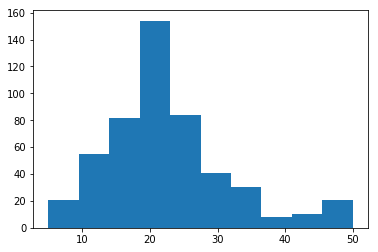

In [8]:

#RM
X0 = boston.iloc[:,5]
#LSTAT
Y0 = boston.iloc[:,12]
#PTRATIO
T0 = boston.iloc[:,10]

#Media
print("---Media---")
x = np.mean(X0)
print("RM: ", x)
y = np.mean(Y0)
print("LSTAT: ", y)
t = np.mean(T0)
print("PTRATIO: ", t)

#Mediana
print("---Mediana---")
x = np.median(X0)
print("RM: ", x)
y = np.median(Y0)
print("LSTAT: ", y)
z = np.median(T0)
print("PTRATIO: ", t)

#Maximo y Mínimo
print("---Minimo y Maximo---")
x1 = min(X0)
x2 = max(X0)
print("RM: ", x1, x2)
y1 = min(Y0)
y2 = max(Y0)
print("LSTAT: ", y1, y2)
t1 = min(T0)
t2 = max(T0)
print("PTRATIO: ", t1, t2)

#Desviacion estandar
print("---Desviacion estandar---")
np.var(X0)
x = np.std(X0)
print("RM: ", x)
np.var(Y0)
y = np.std(Y0)  
print("LSTAT: ", y)
np.var(T0)
t = np.std(T0)  
print("PTRATIO: ", t)

#Calculo de la correlación y tabla con todos los atributos
corr = boston.corr()
plt.figure(figsize=(13,11))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#Plot del histograma de atributos
attr = boston['medv']
plt.hist(attr)



**Q2. Regression model with one variable** 

Select the most correlated attribute (out of the 3 most significative: RM, LSTAT and PTRATIO) to the variable to predict (MEDV).

a) Plot the data points $(x_j,t_j)$ and choose a regression model (linear, polynomial,...) according to the data set.

b) Train the chosen regression model with (1) the closed-form solution and (2) with a batch gradient descent strategy. Plot both models on the dataset and analyse the results.

c) For the gradient descent strategy, plot the error-iteration graph for different choices of the learning rate $\alpha$.  Comment the result.

En este histograma podemos ver que todos los puntos forman una parabola que va en direccion hacia abajo por lo tanto trataremos la regresion de forma polinomica de grado 3
Esta es la matriz compuesta de LSTAT y RM 
: [4.98  9.14  4.03  ... 6.976 6.794 6.03 ]
Nuestro vector serà: 
 [[  1.           4.98        24.8004     123.505992  ]
 [  1.           9.14        83.5396     763.551944  ]
 [  1.           4.03        16.2409      65.450827  ]
 ...
 [  1.           6.976       48.664576   339.48408218]
 [  1.           6.794       46.158436   313.60041418]
 [  1.           6.03        36.3609     219.256227  ]]


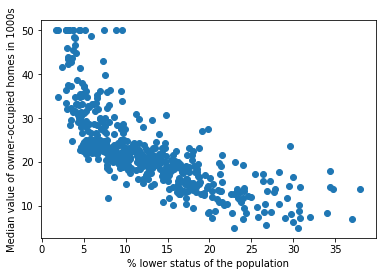

In [89]:

# computeCost : average sum of squares error. Expects
#     X : NxD design matrix
#     t : Nx1 target response variable
#     theta : model parameters
# Read dataset and import necessary libraries
# Read dataset and import necessary libraries

# Load the Boston housing dataset
boston = pd.read_csv('BostonHousing.csv')
boston.head()


def computeCost(X, t, theta):
    N = len(t) # number of training examples
    temp = np.dot(X, theta) - t
    return np.sum(np.power(temp, 2)) / (2*N)

# gradientDescent expects 
#     X : matrix of shape NxD
#     t : vector of shape Nx1
#     alpha : learning rate
#     T : number of iterations
# Returns a Tx2x1 tensor with theta for each iteration

def gradientDescent(X, t, theta, alpha, T):
    vtheta = np.zeros([T,2,1])
    N = len(t) # number of training examples
    for it in range(T):
        y = np.dot(X, theta) - t     # error for current parameters theta
        grad = np.dot(X.T, y)        # product between error and input
        theta = theta - (alpha/N) * grad
        vtheta[it,:] = theta
    return vtheta

#Definimos como X el atributo LSTAT y la Y como el MEDV
X1 = boston.iloc[:,12]
T0 = boston.iloc[:,13]
m = len(T0)

#Creamos la grafica con los puntos que representa nuestra función LSTAT con MEDV
plt.scatter(X0,T0)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in 1000s')
plt.show

print('En este histograma podemos ver que todos los puntos forman una parabola que va en direccion hacia abajo por lo tanto trataremos la regresion de forma polinomica de grado 3')

#Juntamos dos matrices que en este caso seran el atributo LSTAT con el RM, para poder calcular con la fomrula de regresion polinomial 
X2 = boston.iloc[:,5]
X = np.append(X1,X2)
print('Esta es la matriz compuesta de LSTAT y RM \n:', X)

#Funcion de la regresión polinomial
def poly_features(X, K):
    
    X = X.flatten()
    N = X.shape[0]
    
    #Inicializamos Phi
    Phi = np.zeros((N, K+1))
    Phi = np.ones((N, K+1)) 
    
    for k in range(1,K+1):
        Phi[:,k] = np.power(X,k)
    return Phi

print('Nuestro vector serà: \n',poly_features(X,3))


**Q3. Regression model with regularisation**

With the same data as in Question 2:

a) Develop a Ridge regression solution (using weight decay regularization) using a batch gradient descent strategy. Plot the weights as a function of $\lambda$ (lambda). What happens with $\lambda$ increases? Why? <br>
*Comment: Consider exponential steps for $\lambda$, e.g. $\lambda$ = logscale(-6,1,50).*<br>
*Note: Remember that the parameters updates of the batch gradient descent with regularisation are defined as $w_j \leftarrow w_j - \alpha \frac{1}{N}\sum_{n=1}^N (y(\vec{x}_n,\vec{w}) - t_n)x_{n,j} - \alpha \lambda w_j$.*

b) Execute a random selection of the 80% of the dataset for training and 20% for testing. Compute the Ridge regression solution (as in the previous exercice) for the 80% for the training set (80% of the dataset) and compute the error in the test set (20% of the dataset). Plot the error in the test set as a function of $\lambda$ (e.g. the same $\lambda$ as in the previous exercice). Comment the results.

In [91]:

X = boston.data
Y = boston.target

#Inicializamos el Ridge
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X, Y)

#Creamos las matrices con las columnas de LSTAT y MDEV
ridge_lstat = boston.iloc[:,12]
ridge_mdev = boston.iloc[:,13]
ridge_df = np.append(ridge_lstat,ridge_mdev)

#Creamos dos arrays mas vacios.
ridge_train_pred = []
ridge_test_pred = []

#Iteramos las lambdas
for alpha in np.arange(0, 200, 1):
    
    #Train del Ridge
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    #Predicción del Ridge
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))



AttributeError: 'DataFrame' object has no attribute 'data'

**Q4. Optional:** Repeat Question 3 for a Lasso regression function.

**Q5: Predicting Selling Prices**
Imagine that we were a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| --- | --- | --- | --- |
| Total number of rooms | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32 % | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


a) What price would we recommend each client sell his/her home at? <br>
b) Do these prices seem reasonable given the values for the respective features?


In [92]:
#Definimos las columnas del database
X0 = boston.iloc[:,5]
X1 = boston.iloc[:,10]
X2 = boston.iloc[:,12]

#Definimos la potencia
Pot = -0.7
X = np.matrix((np.ones(len(X2)), X0, np.power(X2, Pot), X1)).T
vector = np.linalg.inv(X.T*X)*X.T*t

#Ponemos los precios de los 3 clientes
precio_cl1 =  vector[0,0] + vector[1,0]*5 + vector[2,0]*np.power(17,Pot) + vector[3,0]*8
precio_cl2 =  vector[0,0] + vector[1,0]*4 + vector[2,0]*np.power(32,Pot) + vector[3,0]*11.5
precio_cl3 =  vector[0,0] + vector[1,0]*8 + vector[2,0]*np.power(3,Pot) + vector[3,0]*6.5

print('Los precios serán: ', precio_cl1, precio_cl2, precio_cl3)

Los precios serán:  0.032717605332221664 0.026657228325488495 0.03920735792541108
